# Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import display
import numpy as np
import matplotlib.patches as patches

# Spider Chart Code

In [ ]:
# URLs for data sources
LONDON_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/London_daily_rain.csv"
BERLIN_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Berlin_daily_rain.csv"
EDINBURGH_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Edinburgh_daily_rain.csv"

# Reading data from URLs
london_rain = pd.read_csv(LONDON_URL)
berlin_rain = pd.read_csv(BERLIN_URL)
edinburgh_rain = pd.read_csv(EDINBURGH_URL)

# Assigning city names
london_rain["City"] = "London"
berlin_rain["City"] = "Berlin"
edinburgh_rain["City"] = "Edinburgh"

# Combining datasets
all_dfs = [london_rain, berlin_rain, edinburgh_rain]
all_rain = pd.concat(all_dfs)

# Grouping data by city and month, and calculating mean rainfall
radar_data = all_rain.groupby(['City', 'Month'])['Rainfall (mm)'].mean().reset_index()

# Categories for the radar chart
CATEGORIES = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December", 'January'
]

# Preparing data for the radar chart
london_rain_data = radar_data[radar_data.City == 'London']['Rainfall (mm)'].tolist()
london_rain_data.append(london_rain_data[0])

berlin_rain_data = radar_data[radar_data.City == 'Berlin']['Rainfall (mm)'].tolist()
berlin_rain_data.append(berlin_rain_data[0])

edinburgh_rain_data = radar_data[radar_data.City == 'Edinburgh']['Rainfall (mm)'].tolist()
edinburgh_rain_data.append(edinburgh_rain_data[0])

# Creating a radar chart
spider_chart = go.Figure()

spider_chart.add_trace(go.Scatterpolar(
    r=london_rain_data,
    theta=CATEGORIES,
    name='London'
))

spider_chart.add_trace(go.Scatterpolar(
    r=berlin_rain_data,
    theta=CATEGORIES,
    name='Berlin'
))

spider_chart.add_trace(go.Scatterpolar(
    r=edinburgh_rain_data,
    theta=CATEGORIES,
    name='Edinburgh'
))

# Updating the layout of the radar chart
spider_chart.update_layout(
    title='Monthly Average Rainfall (mm)',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 25]
        ),
        angularaxis=dict(
            rotation=90,
            direction='clockwise'
        )
    ),
    showlegend=True
)

# Spider Chart

In [ ]:
spider_chart.show()
# I like the roundness of this plot.
# I think it is advantageous for cyclical data (time of the day, week, year) compated to line chart.
# Because, it connects the end points, as it should be in the cycle.

# Hexbin Code

In [ ]:
# Load Pokemon data
pokemon_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
pokemon_data = pd.read_csv(pokemon_url)

# Set the style for the plot
sns.set_style("white")

# Create a hexbin jointplot of Attack vs Total scores for Pokémon
hexbin_plot = sns.jointplot(data=pokemon_data,
                            x="Attack",
                            y="Total",
                            kind="hex",
                            color="#4CB391")

# Set the title of the plot
hexbin_plot.fig.suptitle('Attack vs Total Scores For All Pokemons', y=1.05)

# Close the plot to prevent it from displaying automatically
plt.close(hexbin_plot.fig)

# Hexbin

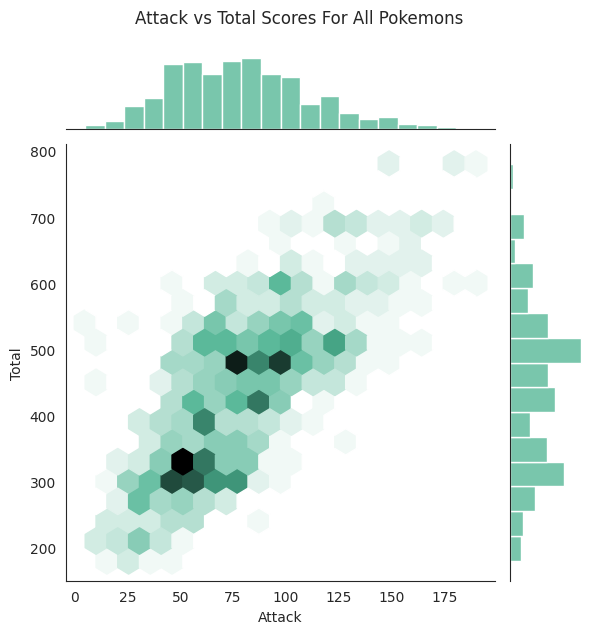

In [ ]:
display(hexbin_plot.fig)
# I like this one because it elegantly combines two distributions into a simple visual.
# From this one, it is easy to observe two clusters that the data is forming.

# Correlation Exploration Code

In [ ]:
# Load California housing data
california_housing_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/California_housing.csv"
california_housing_data = pd.read_csv(california_housing_url)

# Create a pair plot to explore correlations between features
pair_plot = sns.pairplot(
    data=california_housing_data,
    kind='reg',
    plot_kws={
        'color': 'grey',
        'line_kws': {'color': 'red'}
    }
)

# Close the plot to prevent it from displaying automatically
plt.close()

# Correlation Exploration

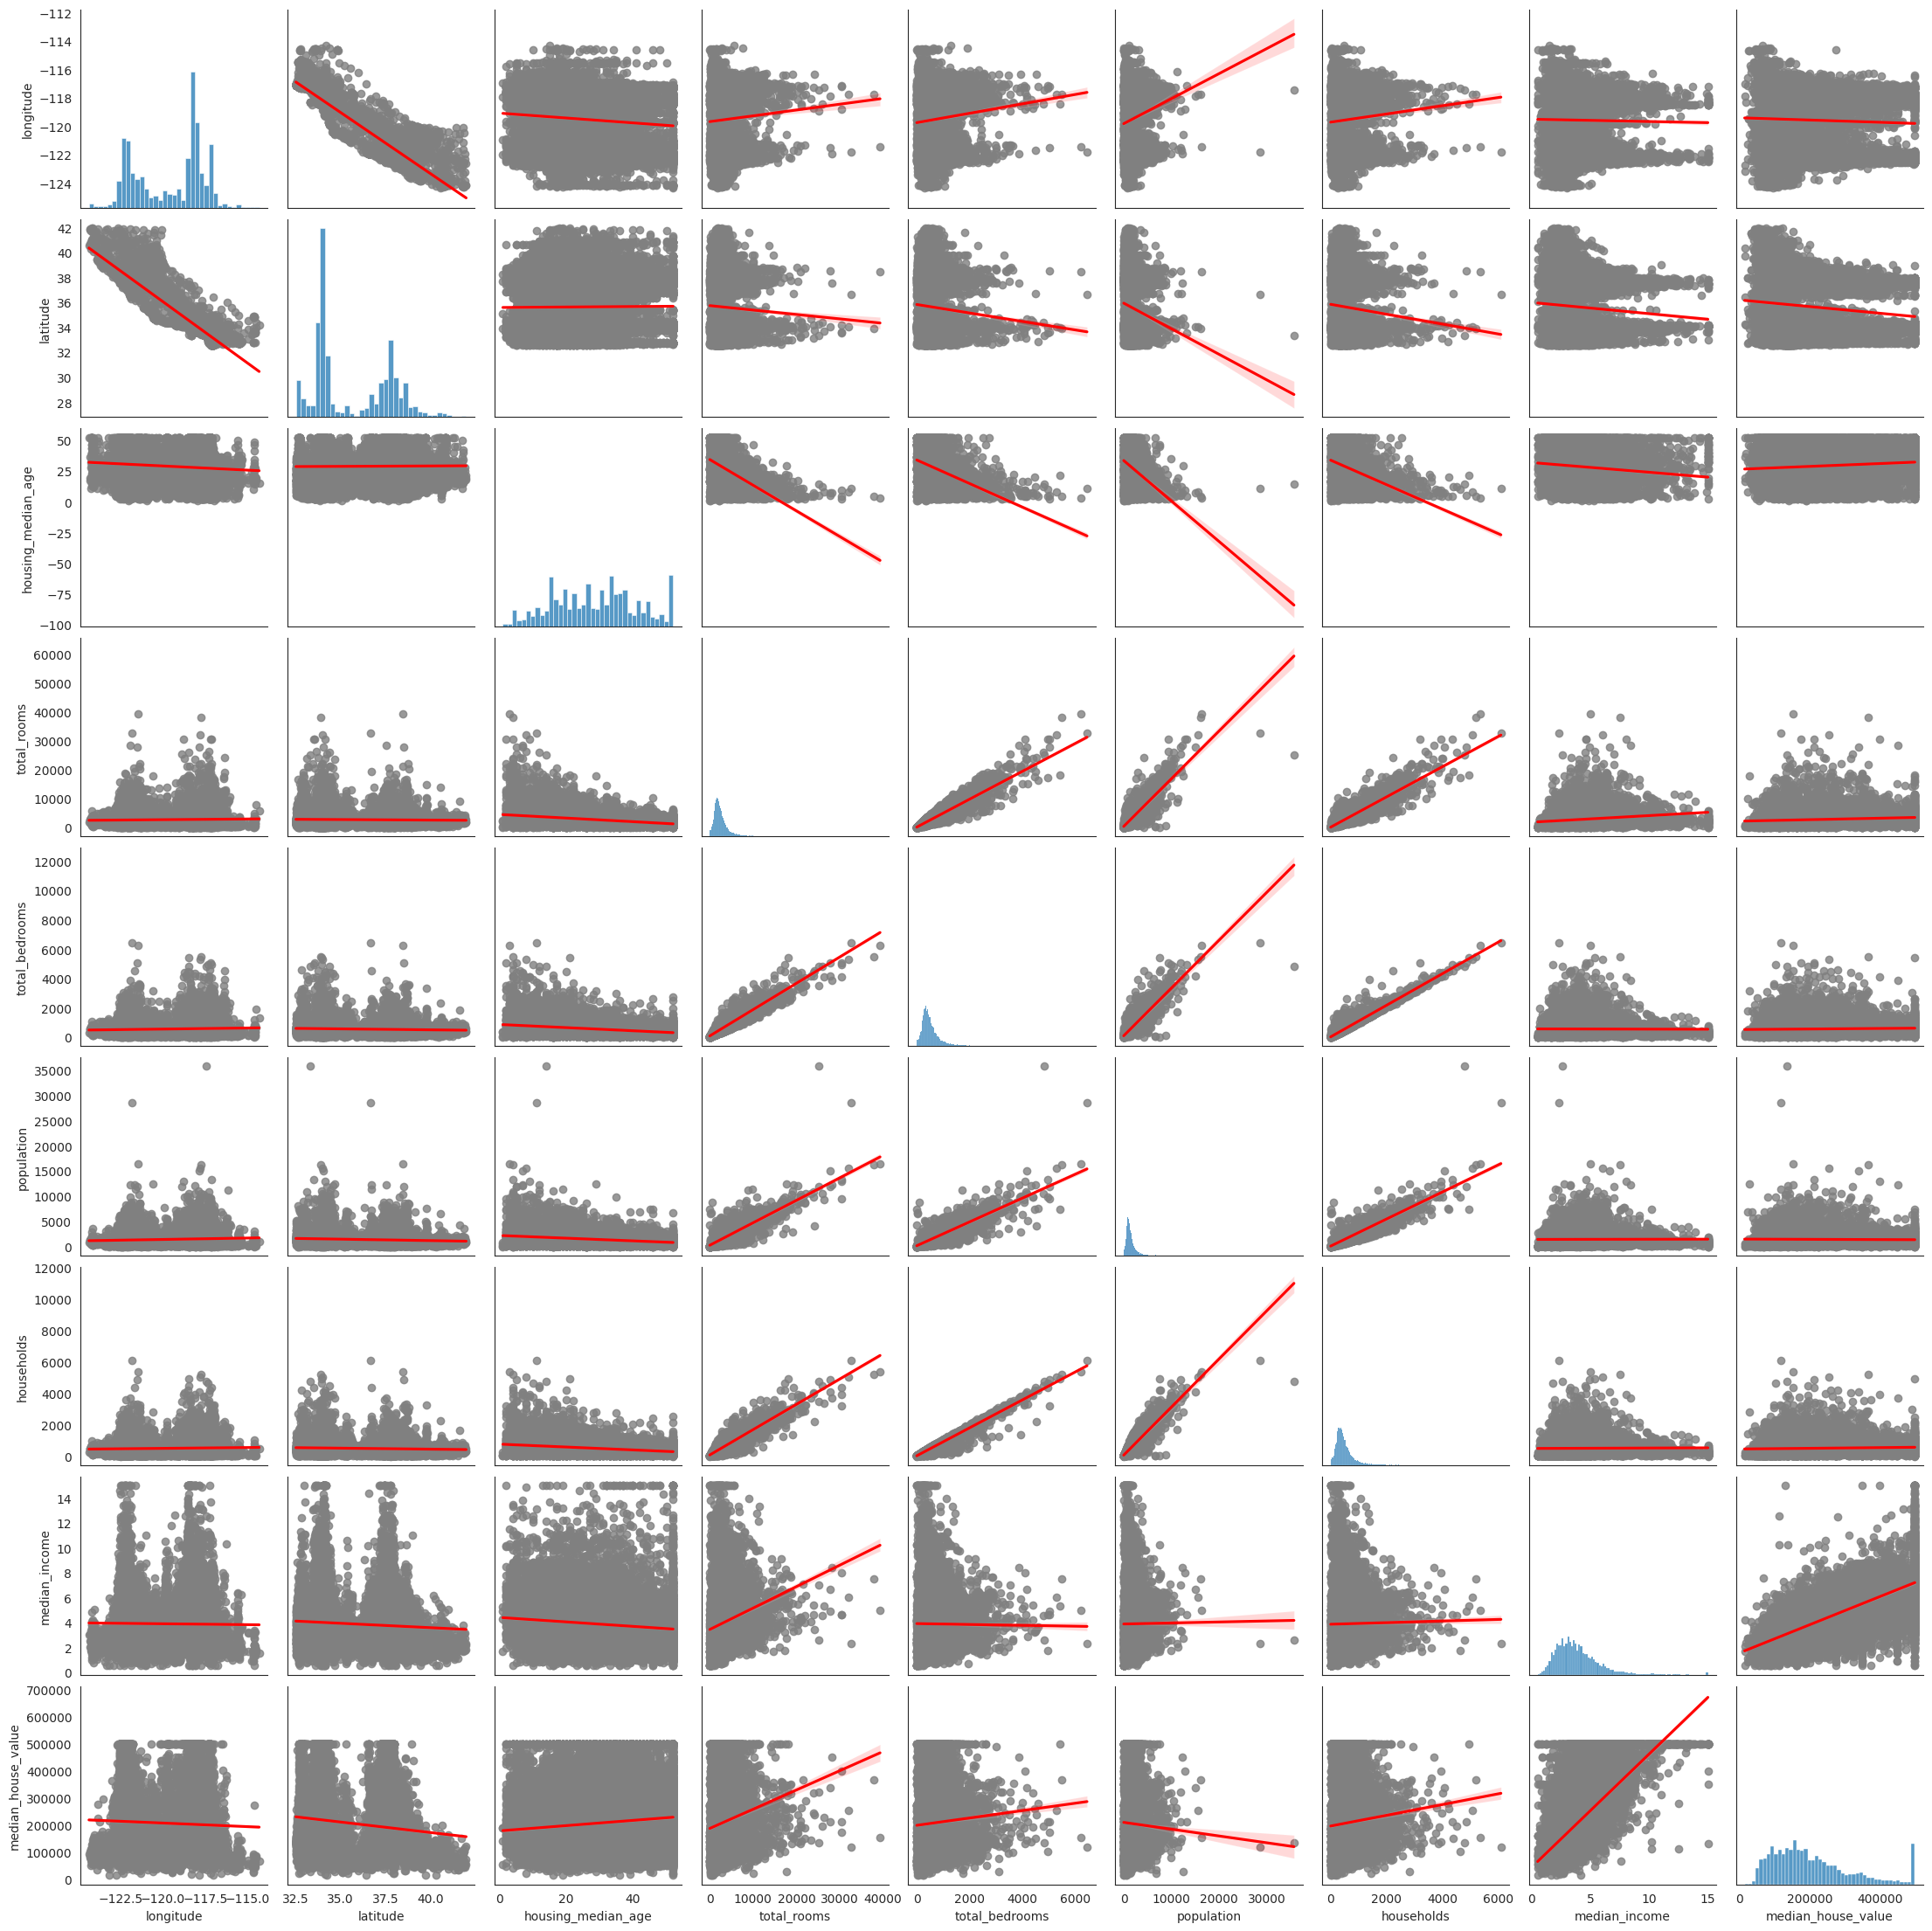

In [ ]:
display(pair_plot.fig)
# This one was chosen as an effective tool for data exploration.
# It allows to explore pairwise correlations, and move further from there.

# Mapping Data Code

In [ ]:
#  Change column names
california_housing_data.rename(
    columns={
        'longitude': 'Longitude',
        'latitude': 'Latitude',
        'median_house_value': 'Median House Value',
        'median_income': 'Median Income'
    },
    inplace=True
)

# Sort data to display bigger points on the top on the small ones for clarity
california_housing_data.sort_values('Median Income', inplace=True)

# Create a geographical plot to represent housing data variables by location
geo_plot = sns.relplot(
    data=california_housing_data,
    x="Longitude",
    y="Latitude",
    hue='Median House Value',
    size='Median Income',
    sizes=(1, 35),
    palette='hls'
)

# Set the title of the figure
geo_plot.fig.suptitle("Average Housing Price vs Income in California", y=1.05)


# Close the plot to prevent it from displaying automatically
plt.close()

# Mapping Data

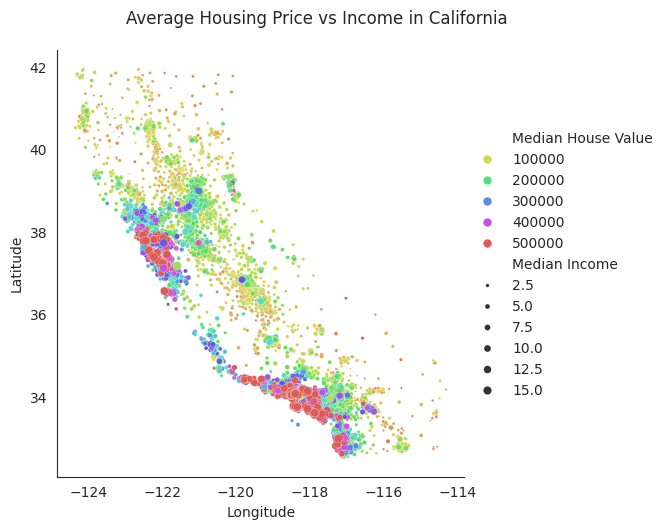

In [ ]:
display(geo_plot.fig)
# This visualization helps to see how data is distributed geographically.
# This allows for detecting rich clusters.

# Heatmap Code

In [24]:
# Load IGN scores dataset
IGN_URL = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/ign_scores.csv"
ign_scores = pd.read_csv(IGN_URL, index_col='Platform')

# Create a heatmap plot with specific dimensions
heatmap, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    ign_scores,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=.5,
    ax=ax,
    annot_kws={"size": 8}  # Adjust annotation text size
)

# Set titles and labels for clarity
ax.set_title('Average Rating by Platform VS Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Platform')

# Adjust layout to ensure there is no clipping of tick labels
plt.tight_layout()

# Close the plot to prevent it from displaying automatically
plt.close(heatmap)

# Heatmap

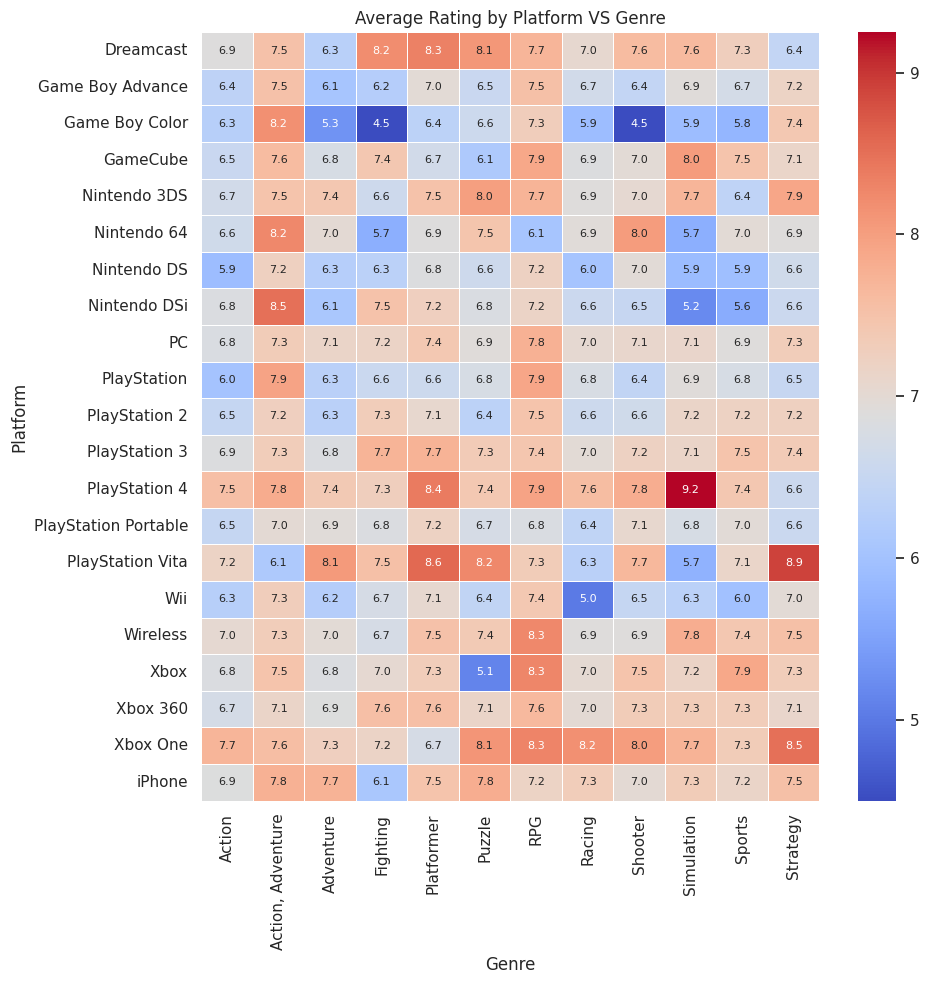

In [25]:
display(heatmap)
# This heatmap allows for easy representation of game ratings by genre and platform.
# I like it because it is very minimalistic/simplistic, yet so informative.

# Politicians Data Code

In [ ]:
# Barchart
# Load and preprocess transaction data
data_url = 'https://raw.githubusercontent.com/maxdokukin/Politician-Trades/main/Data/data/transactions_cleaned.csv'
transactions = pd.read_csv(data_url)
transactions['Transaction Date'] = pd.to_datetime(transactions['Transaction Date'])
transactions['Publication Date'] = pd.to_datetime(transactions['Publication Date'])

# Aggregate data to get transaction counts by politician
aggregated_data = transactions.groupby('Politician Name')['Party'].count().sort_values(ascending=False).reset_index()
aggregated_data.columns = ['Politician Name', 'Transaction Count']
aggregated_data = aggregated_data.merge(transactions[['Politician Name', 'Party']].drop_duplicates(), on='Politician Name')

# Create a bar chart
plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black"})

ax = sns.barplot(
    data=aggregated_data.sort_values('Transaction Count', ascending=False).head(20),
    y='Politician Name',
    x='Transaction Count',
    hue='Party',
    palette=['blue', 'red']
)

# Set chart appearance
ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Transaction Count', color='white')
plt.ylabel('', color='white')
plt.title('Top Traders by Party in the Past 3 Years', color='white')
plt.legend(
    title='Party',
    title_fontsize='13',
    loc='lower left',
    bbox_to_anchor=(0.887, 0),
    frameon=True,
    facecolor='grey',
    edgecolor='white',
    fontsize='10'
)

# Save the figure and close
politicians_barchart = ax.get_figure()
plt.close(politicians_barchart)

In [ ]:
# Violin
# Filter data to exclude entries where Party is 'Other'
filtered_data = transactions[transactions['Party'] != 'Other']

# Set up the aesthetics for the plot
plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="darkgrid", rc={"axes.facecolor": ".9"})

# Create a violin plot to display trading activity by party
ax = sns.violinplot(
    data=filtered_data,
    x='Transaction Date',
    hue='Party',
    palette=['blue', 'red'],
    split=True
)

# Customize the appearance of the plot
ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Transaction Date', color='white')
plt.ylabel('Volume of Trades', color='white')
plt.title('Trading Activity by Parties', color='white')

# Set the legend with custom styling
plt.legend(
    title='Party',
    title_fontsize='13',
    loc='lower left',
    bbox_to_anchor=(0.887, 0),
    frameon=True,
    facecolor='grey',
    edgecolor='white',
    fontsize='10'
)

# Set the x-axis limits based on the Transaction Date range
ax.set_xlim(filtered_data['Transaction Date'].min(), filtered_data['Transaction Date'].max())

# Save the plot to a variable and prevent automatic display
politicians_violin = ax.get_figure()
plt.close(politicians_violin)

# Politicians Data

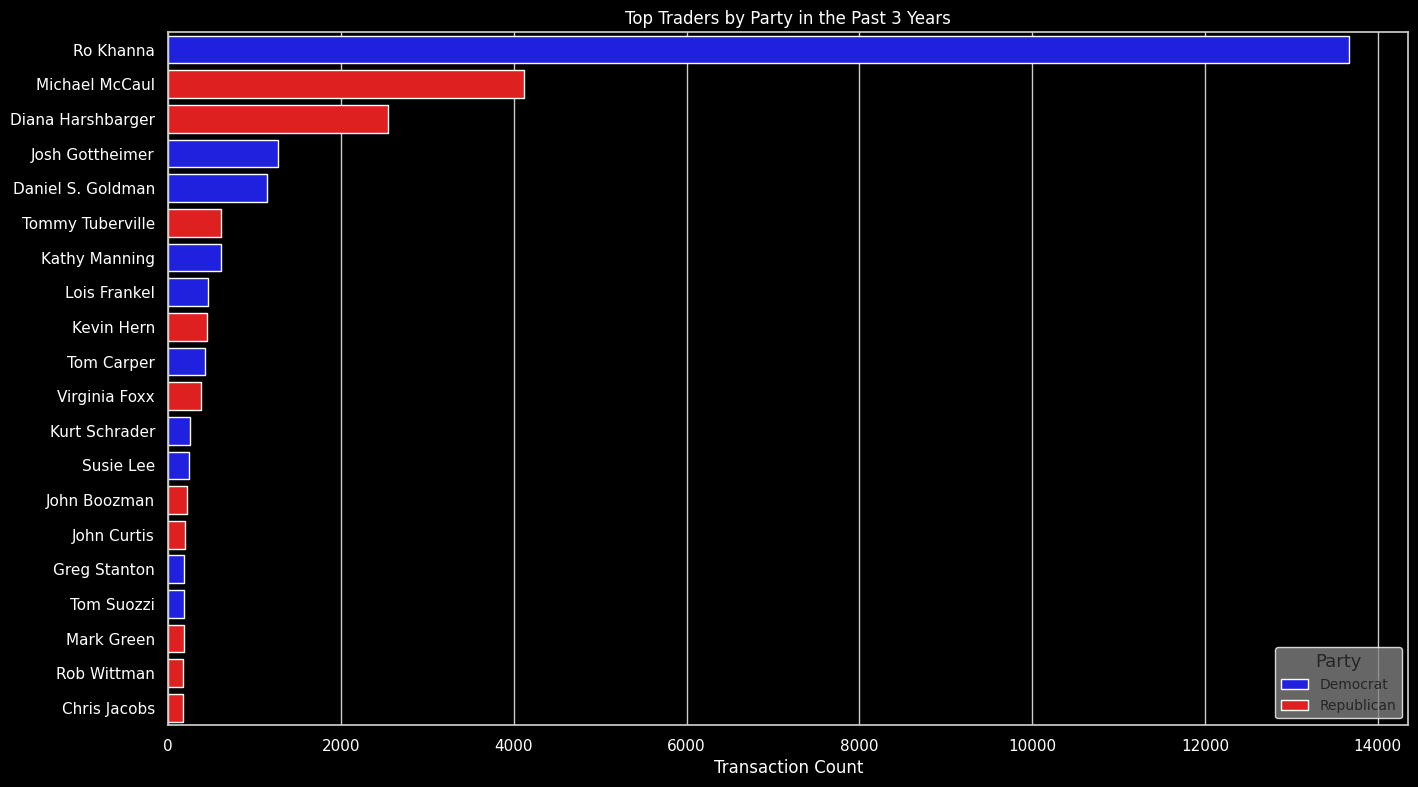

In [ ]:
display(politicians_barchart)
# This one demonstrates the dark theme.
# Also colors mapped to parties, makes it intuitively effective.

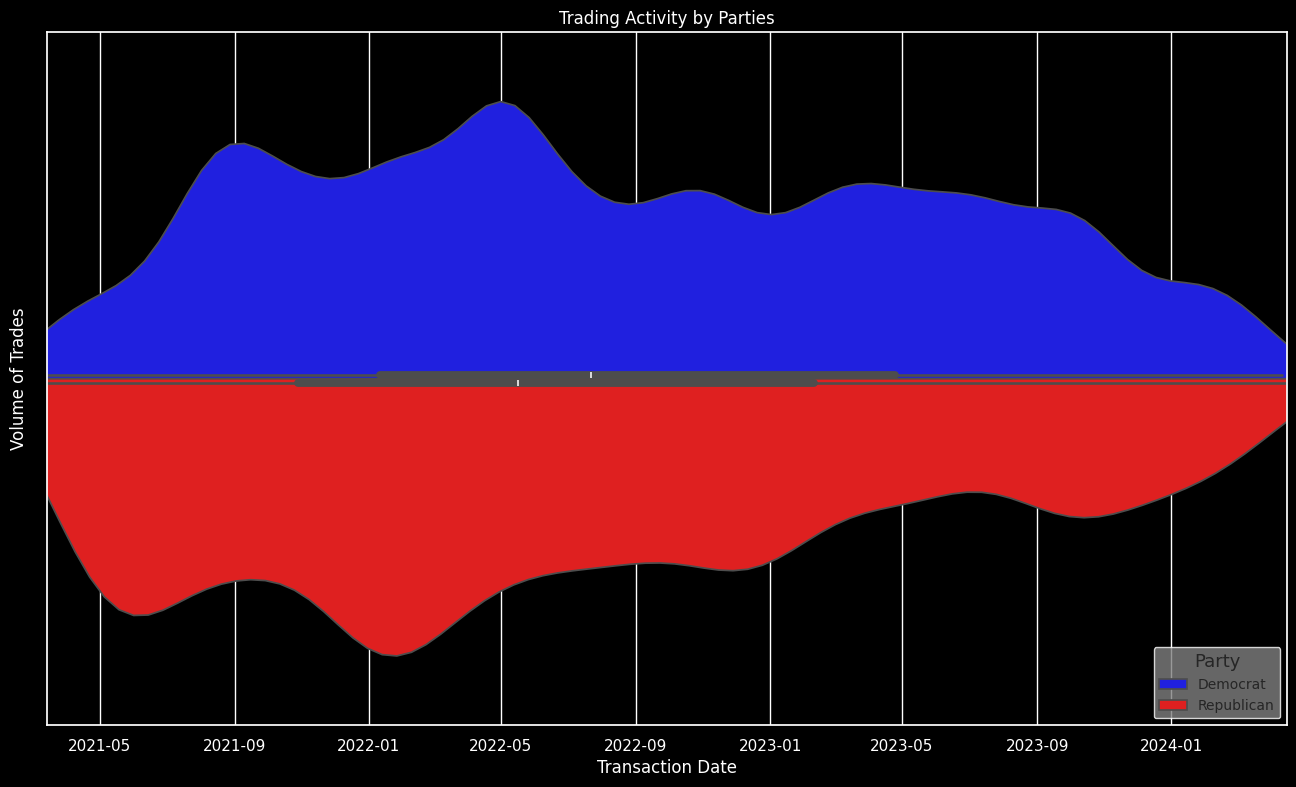

In [ ]:
display(politicians_violin)
# This violin plot allows for exploration of the politician trading activity over the time.
# Violin shape helps to compare the volumes of transactions made by party.
# Also colors mapped to parties, makes it intuitively effective.

# Good To Know Code

In [ ]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
drinks_data = pd.read_csv(data_url)

# Drop the column 'total_litres_of_pure_alcohol'
drinks_data.drop('total_litres_of_pure_alcohol', axis=1, inplace=True)

# Reshape the data to have drinks and servings in separate columns
drinks_data = drinks_data.melt(
    id_vars=['country'],
    var_name='drink',
    value_name='servings'
)
# Remove the '_servings' suffix from the drink names
drinks_data['drink'] = drinks_data['drink'].str.removesuffix('_servings')

# Filter to get top 10 beer-consuming countries
beer_consumption_data = drinks_data[drinks_data['drink'] == 'beer'].sort_values('servings', ascending=False).head(10)

# Function to create bubble pattern
def create_bubble_pattern(ax, bars, num_bubbles=80):
    for bar in bars:
        x = bar.get_x()
        y = bar.get_y()
        width = bar.get_width()
        height = bar.get_height()

        for _ in range(num_bubbles):
            bubble_x = x + np.random.uniform(0, width)
            bubble_y = y + np.random.uniform(0, height)
            bubble_size = np.random.uniform(0.1, 0.35)
            circle = patches.Ellipse((bubble_x, bubble_y),
                                     width=bubble_size * width / 15,
                                     height=bubble_size * height,
                                     edgecolor='white',
                                     facecolor='none',
                                     linewidth=1,
                                     alpha=0.6)
            ax.add_patch(circle)

# Set the style for the plot
sns.set_style("white")

# Create a bar plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=beer_consumption_data,
    x="servings",
    y="country",
    orient="h",
    color='orange'
)

# Add bubble pattern to bars
create_bubble_pattern(ax, ax.patches)

# Set labels and title for the plot
ax.set(xlabel='Servings per Capita', ylabel='')
plt.title('Top Beer Consumers')

# Save the plot to a variable and prevent automatic display
beer_consumption_fig = ax.get_figure()
plt.close(beer_consumption_fig)

# Display the figure
beer_consumption_fig.show()


# Good To Know

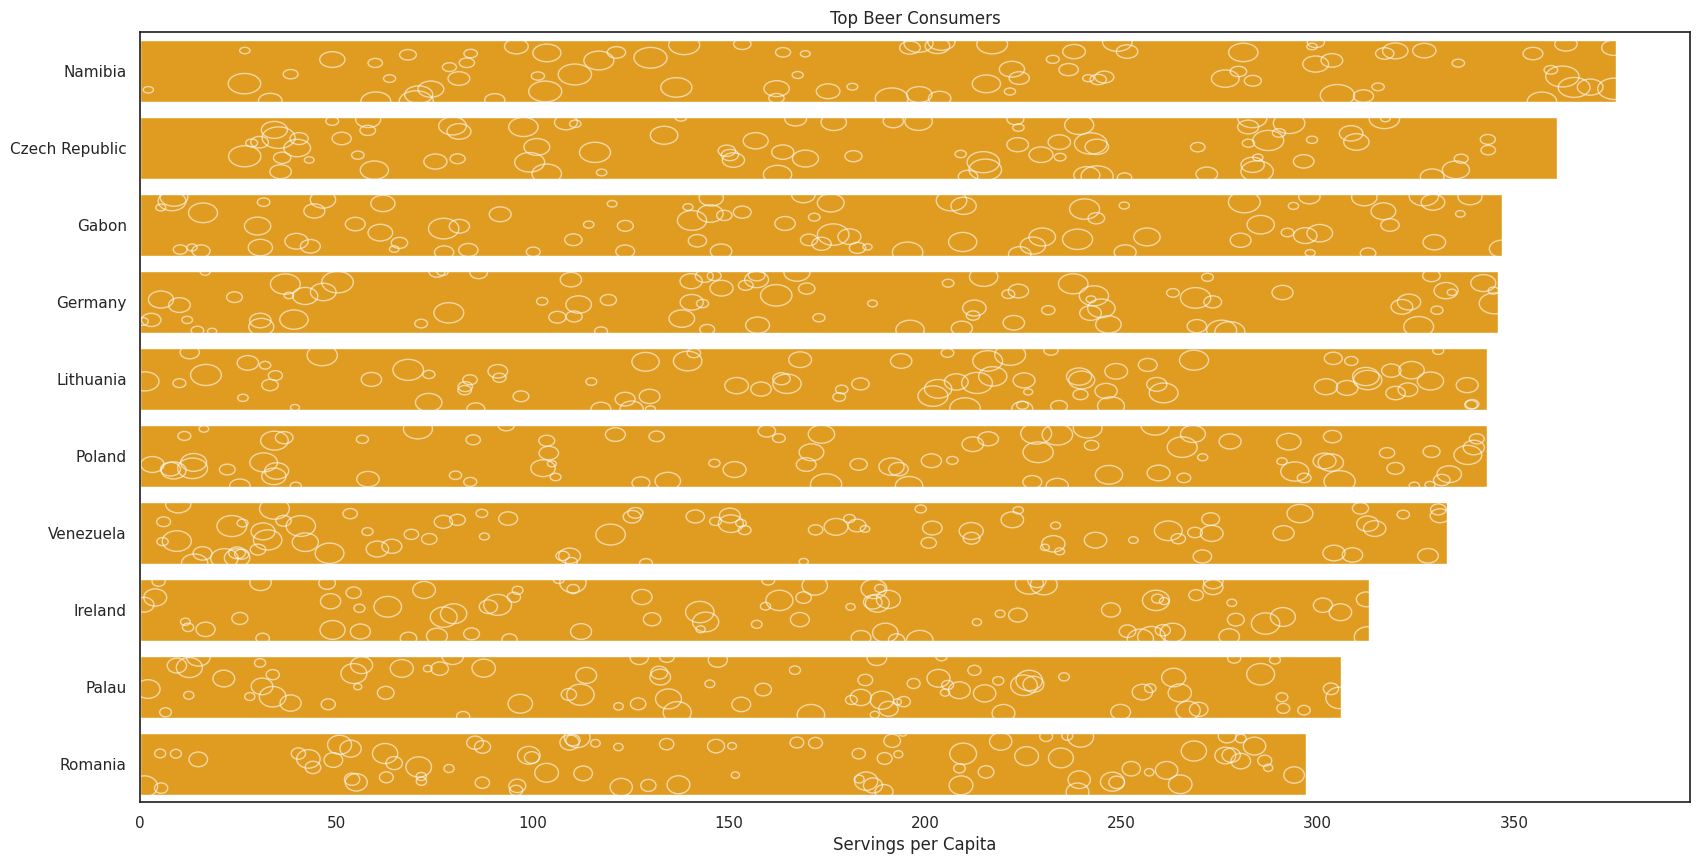

In [ ]:
display(beer_consumption_fig)
# Just a piece of information to keep in mind.